In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original',data_home ='C:\\Users\\Administrator\\Desktop')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
X,y = mnist['data'],mnist['target']
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


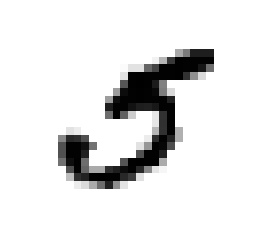

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = 'nearest')
plt.axis('off')
plt.show()

In [4]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [5]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]


In [6]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state =42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [8]:
sgd_clf.predict([some_digit])

array([ True])

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_folds = X_train[test_index]
    y_test_folds = (y_train_5[test_index])
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

0.9686
0.956
0.9656


In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring = 'accuracy')

array([0.9686, 0.956 , 0.9656])

In [11]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)
    

In [12]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring = 'accuracy')

array([0.9078 , 0.90965, 0.9115 ])

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[54075,   504],
       [ 1692,  3729]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)


0.8809355067328136

In [16]:
recall_score(y_train_5,y_train_pred)

0.6878804648588821

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7725295214418892

In [18]:
y_scores =sgd_clf.decision_function([some_digit])
y_scores

array([95633.8823848])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [20]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                            method = 'decision_function')
from sklearn.metrics import precision_recall_curve
precisions, recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

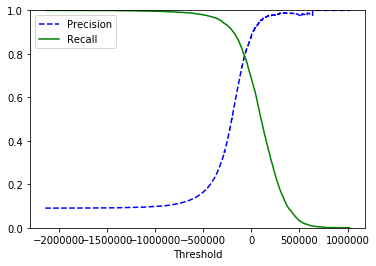

In [21]:
def plot_precision_recall_vs_threshold(precisios,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label = 'Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [22]:
y_train_pred_90 = (y_scores>70000)
precision_score(y_train_5,y_train_pred_90)

0.9353355807539074

In [23]:
recall_score(y_train_5,y_train_pred_90)

0.5629957572403615

In [24]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

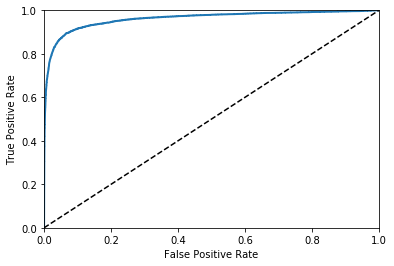

In [25]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9617892872658818

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state =42)
y_probas_forest = cross_val_predict(forest_clf,
                                   X_train,y_train_5,
                                   cv=3,method = 'predict_proba')

In [28]:
y_score_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_score_forest)

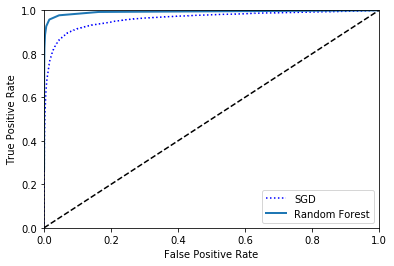

In [29]:
plt.plot(fpr,tpr,'b:',label = 'SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='bottom right')
plt.show()

In [30]:
roc_auc_score(y_train_5,y_score_forest)

0.992779075007713

多类分类

In [31]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5.])

In [32]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-299038.52232395, -443302.15366433, -458190.69219173,
        -119566.5229228 , -559648.23835095,   95633.8823848 ,
        -530604.31682191, -312142.64950005, -541425.22467879,
        -530989.22692486]])

In [33]:
np.argmax(some_digit_scores)

5

In [34]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [35]:
sgd_clf.classes_[5]

5.0

In [36]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([3.])

In [38]:
len(ovo_clf.estimators_)

45

In [39]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5.])

In [40]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])


array([3.])

In [41]:
len(ovo_clf.estimators_)

45

In [43]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5.])

In [44]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [45]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.85322935, 0.85709285, 0.87243086])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.91226755, 0.91029551, 0.9059859 ])

误差分析

In [48]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5718,    2,   28,   11,   11,   52,   46,   10,   42,    3],
       [   1, 6469,   42,   31,    6,   40,    7,   11,  125,   10],
       [  56,   37, 5325,  121,   83,   19,   96,   60,  143,   18],
       [  46,   37,  131, 5392,    3,  204,   37,   56,  126,   99],
       [  20,   26,   34,    7, 5342,   10,   50,   30,   86,  237],
       [  65,   38,   33,  205,   73, 4589,  113,   30,  175,  100],
       [  26,   24,   44,    2,   42,   91, 5638,    3,   48,    0],
       [  20,   24,   72,   34,   59,   10,    4, 5783,   17,  242],
       [  46,  147,   66,  176,   16,  155,   58,   31, 5014,  142],
       [  39,   31,   26,   91,  147,   34,    2,  199,   79, 5301]],
      dtype=int64)

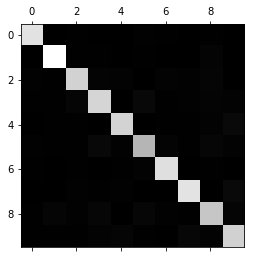

In [49]:
plt.matshow(conf_mx,cmap =plt.cm.gray)
plt.show()

In [50]:
row_sums= conf_mx.sum(axis =1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

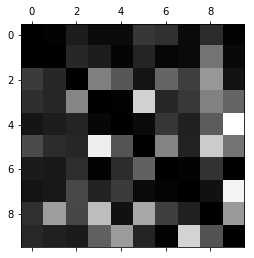

In [52]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap = plt.cm.gray)
plt.show()

In [55]:
cl_a,cl_b = 3,5
X_aa = X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab = X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba = X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb = X_train[(y_train==cl_b)&(y_train_pred==cl_b)]



多标签分类

In [56]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train>=7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_large,y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [59]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_train,cv=3)
# f1_score(y_train,y_train_knn_pred,average='mecro')

多输出分类

In [60]:
noise_train = np.random.randint(0,100,(len(X_train),784))
noise_test = np.random_randint(0,100,(len(X_test),784))
X_train_mod = X_train+noise_train
X_test_mod = X_test+noise_test


AttributeError: module 'numpy' has no attribute 'random_randint'

In [ ]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
